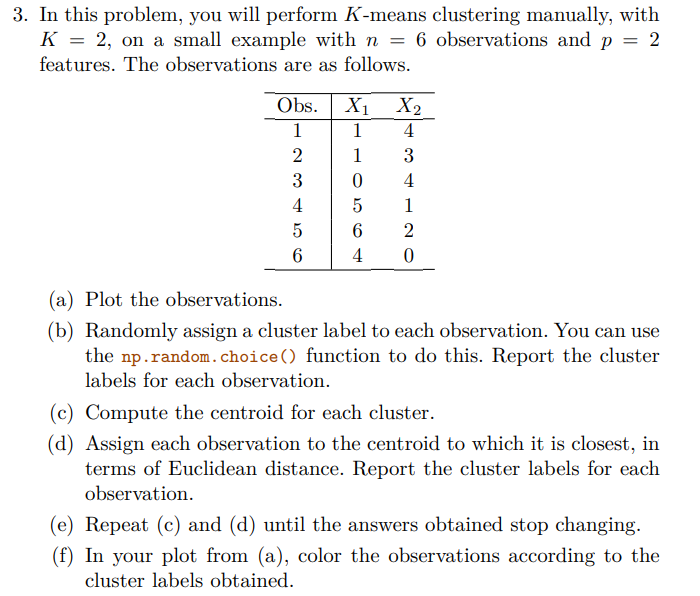

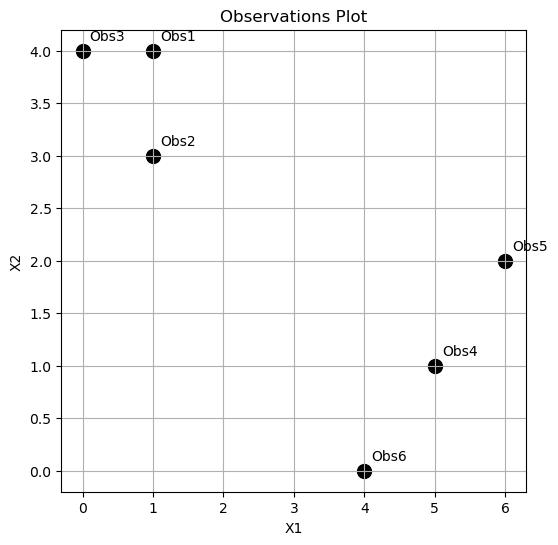

In [3]:
# (a)
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [1, 4],
    [1, 3],
    [0, 4],
    [5, 1],
    [6, 2],
    [4, 0]
])

n_samples = X.shape[0]

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, color='black')
for i in range(n_samples):
    plt.text(X[i, 0]+0.1, X[i, 1]+0.1, f"Obs{i+1}")
plt.title("Observations Plot")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


In [4]:
# (b)
np.random.seed(0)  
K = 2  

labels = np.random.choice(K, n_samples)  
print("Initial random cluster labels:", labels)


Initial random cluster labels: [0 1 1 0 1 1]


In [5]:
centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
print("Centroids:\n", centroids)

Centroids:
 [[3.   2.5 ]
 [2.75 2.25]]


In [6]:
distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
new_labels = np.argmin(distances, axis=1)
print("New cluster labels:", new_labels)

New cluster labels: [1 1 1 0 0 1]


In [7]:
iteration = 0
while True:
    iteration += 1
    print(f"\nIteration {iteration}")

    centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
    print("Centroids:\n", centroids)

    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    new_labels = np.argmin(distances, axis=1)
    print("New cluster labels:", new_labels)

    if np.array_equal(labels, new_labels):
        print("Convergence reached.")
        break
    labels = new_labels


Iteration 1
Centroids:
 [[3.   2.5 ]
 [2.75 2.25]]
New cluster labels: [1 1 1 0 0 1]

Iteration 2
Centroids:
 [[5.5  1.5 ]
 [1.5  2.75]]
New cluster labels: [1 1 1 0 0 0]

Iteration 3
Centroids:
 [[5.         1.        ]
 [0.66666667 3.66666667]]
New cluster labels: [1 1 1 0 0 0]
Convergence reached.


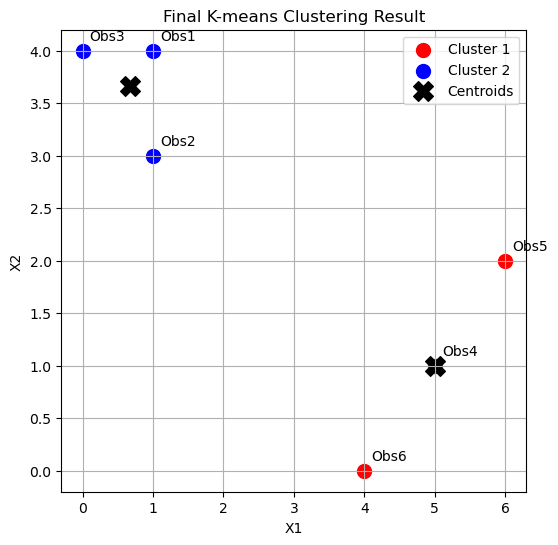

In [8]:
plt.figure(figsize=(6, 6))
colors = ['red', 'blue']
for k in range(K):
    cluster_points = X[labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=100, color=colors[k], label=f"Cluster {k+1}")
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X', label="Centroids")
for i in range(n_samples):
    plt.text(X[i, 0]+0.1, X[i, 1]+0.1, f"Obs{i+1}")
plt.title("Final K-means Clustering Result")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()